In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [29]:
Length=5000 #length in nm
Npoints=102 #number of masses in CNT
N_cnt=Npoints*6 #number of masses in CNT with with the degrees of freedom per mass included
sigma=7.767E-25 #kg/nm^2
X0_cnt=(Length)/(Npoints-3) #discrete length of CNT in nm
d_cnt=3 #diameter in nm
C=3.45E-22 #kg/ps^2

mass=np.pi*sigma*d_cnt*X0_cnt #total mass of a CNT

K_cnt=(np.pi*C*d_cnt)/(X0_cnt) #extensional rigidity

kap_cnt=(K_cnt*d_cnt*d_cnt)/8 #bending rigidity

mass_array=np.zeros(Npoints)
K_cnt_array=np.zeros(Npoints)
kap_cnt_array=np.zeros(Npoints)

mass_array.fill(mass)
K_cnt_array.fill(K_cnt)
kap_cnt_array.fill(kap_cnt)
#print(mass_array)
#print(K_cnt_array)
#print(kap_cnt_array)

In [30]:
_fbase= 'mass'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()

_fbase='K_cnt'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(K_cnt_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()

_fbase='kap_cnt'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(kap_cnt_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()

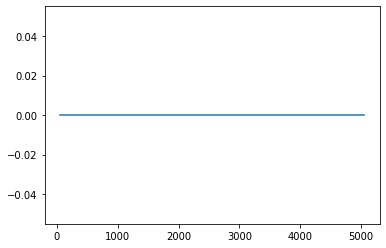

In [31]:
X0_cnt=Length/(Npoints-3)
_x=np.linspace(0,Length,Npoints)[:]
_y=np.zeros(np.shape(_x))
_y=_x*0
x=np.zeros(Npoints)
x[::]=_x+X0_cnt
y=np.zeros(Npoints)
y[::]=_z

#print(x)
#print(z)

_outdata=np.zeros(Npoints*6)

_outdata[0::6]=x
_outdata[1::6]=y

#print(_outdata)

plt.plot(x,y)
plt.show()

In [32]:
_fbase='inputFile'
_fname=_fbase + '_0' + str(47) +'.txt'
_fid=open(_fname,'w+b')
_fid.write(bytearray(_outdata))
_fid.close()

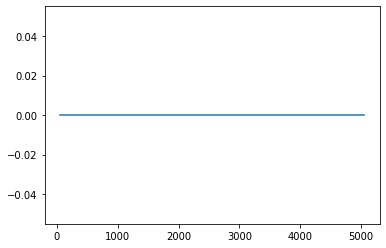

In [33]:
_fname='./initfiles/inputFile_047.txt'
_fid=open(_fname)
_data=np.fromfile(_fid,dtype='float')
Npoints=len(_data)/6
_fid.close()
x_init=_data[0::6]
y_init=_data[1::6]
plt.plot(x_init,y_init)
plt.show()